<a href="https://colab.research.google.com/github/akdgAkash12/Olympics-Data-Analysis/blob/main/Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLYMPICS DATA ANALYSIS**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows=4000
pd.options.display.max_columns=None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
   print(os.path.join(dirname, filename))

# Entering new Data

In [ ]:
data=pd.read_csv("dataset_Olympics.csv", encoding='latin-1')
data1=pd.read_csv("noc_regions.csv",encoding='latin-1')

In [ ]:
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


# Finding unique values

In [ ]:
print(data.Gender.unique())
print(data.Event_gender.unique())

['Women' 'Men' nan]
['W' 'M' 'X' nan]


# Droping Columns because not required

In [ ]:
data = data.drop('Country_Code', axis=1)
data = data.drop('Event_gender',axis=1)
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


# Finding Null Value and droping

In [ ]:
print(data.isnull().sum())
data=data.dropna(how='all')
print(data.isnull().sum())
data=data.astype({'Year':'int'})
data.head()

City          117
Year          117
Sport         117
Discipline    117
Event         117
Athlete       117
Gender        117
Country       117
Medal         117
dtype: int64
City          0
Year          0
Sport         0
Discipline    0
Event         0
Athlete       0
Gender        0
Country       0
Medal         0
dtype: int64


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


# Focussing on City And Year

  Q1.Which city hosted maximum number of olympics
  Logic:Focus on City and Year.Get unique Year.Print the data.

In [ ]:
q1_data=data[["City",'Year']]
q1_data=q1_data.drop_duplicates('Year')
q1_data

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


Ans:So It seems like,since1 976 no city has hosteed Olympics twice.

Q2.Which city hosted most events.
logic:Focus on City.Find count of unique values.Print the count

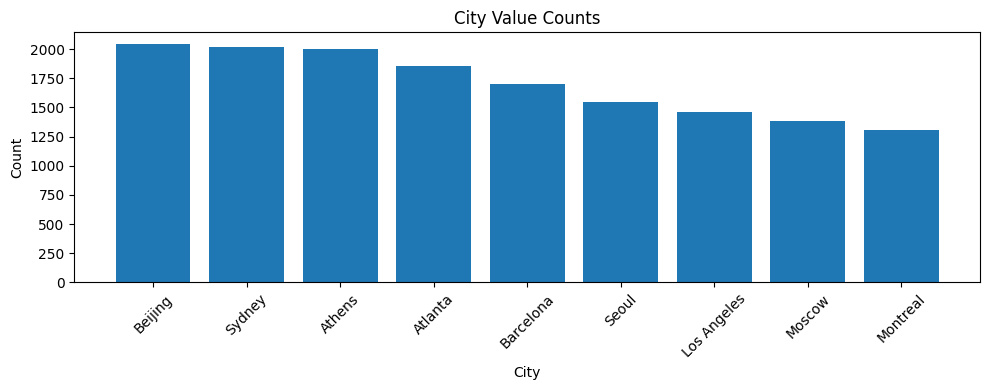

In [ ]:


q2_data = data['City'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(q2_data.index, q2_data.values)

plt.xlabel("City")
plt.ylabel("Count")
plt.title("City Value Counts")
plt.xticks(rotation=45)  # rotate city labels if needed
plt.tight_layout()
plt.show()
# q2_data.plot(kind='bar',x='City',y='Count')

Ans : Beijing has the hosted the biggest Olympics since 1976 till 2008. Followed by
 Sydney and Athens.

Q3. Understand the events themselves.


 logic : Focus on Sport, Discipline and Event. Use group by and see how many kinds
 and variations are there.

In [ ]:
q3_data = data[['Sport','Discipline','Event']].drop_duplicates().sort_values(['Sport','Event']).reset_index(drop=True)
print(f"Total number of unique events held so far: {len(q3_data)}")
q3_data

Total number of unique events held so far: 334


,Sport,Discipline,Event
0,Aquatics,Swimming,100m backstroke
1,Aquatics,Swimming,100m breaststroke
2,Aquatics,Swimming,100m butterfly
3,Aquatics,Swimming,100m freestyle
4,Aquatics,Diving,10m platform
5,Aquatics,Swimming,1500m freestyle
6,Aquatics,Swimming,200m backstroke
7,Aquatics,Swimming,200m breaststroke
8,Aquatics,Swimming,200m butterfly
9,Aquatics,Swimming,200m freestyle


Q4. Which Athlete has win most medal from given period?

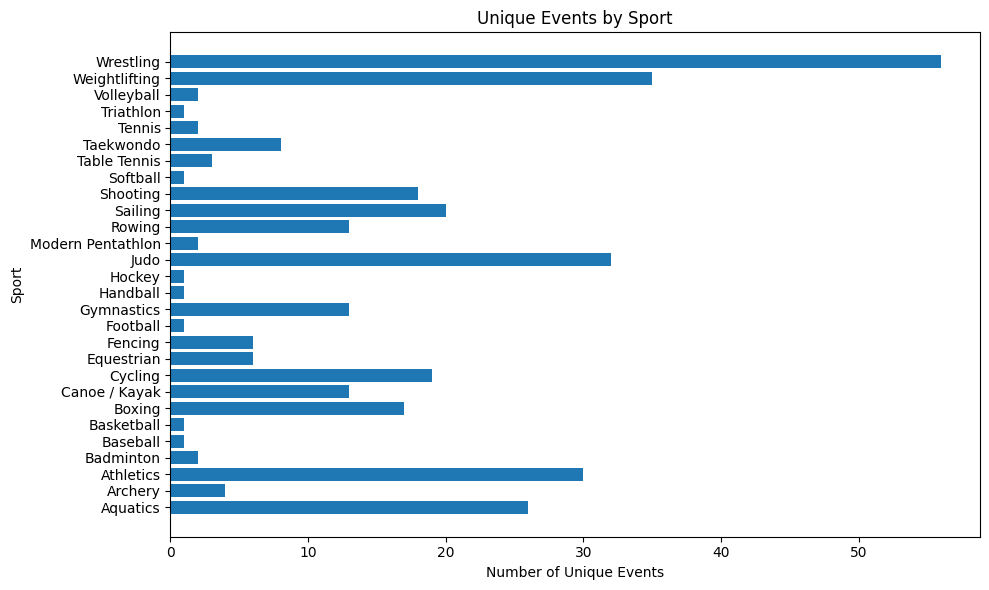

In [ ]:

q3_data_count = q3_data.groupby('Sport').size()

plt.figure(figsize=(10, 6))
plt.barh(q3_data_count.index, q3_data_count.values)

plt.xlabel("Number of Unique Events")
plt.ylabel("Sport")
plt.title("Unique Events by Sport")
plt.tight_layout()
plt.show()

Ans. Sports with most events are Wrestling, Weightlifting and Judo. Total number of
 unique events are held: 334

 Q4. Which Athlete has won most medal from given period?

In [ ]:
q4_data=data.groupby(['Athlete'])['Athlete'].count().reset_index(name='Count').sort_values(ascending=False,by=['Count'])
q4_data=q4_data[:10]

<Axes: xlabel='Athlete'>

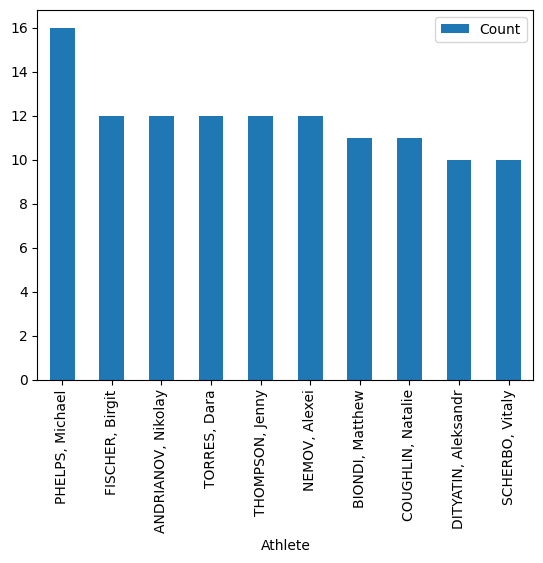

In [ ]:
q4_data.plot.bar(x='Athlete',y='Count')

Ans. So Michael Phelps won 16 mdeal during 1976 to 2008. Clearly mindblowing
 record !!

Q5. Put some light on gender ratio in winning teams?

<Axes: ylabel='Gender'>

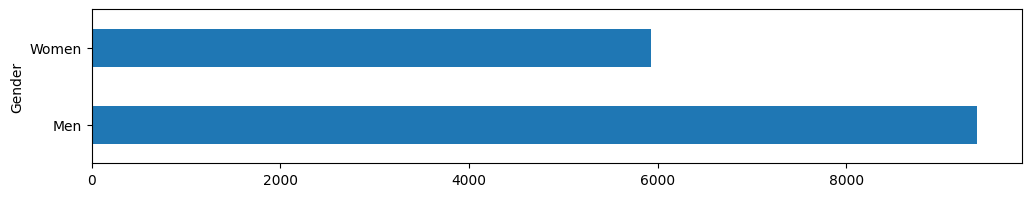

In [ ]:
q5_data=data.groupby(['Gender'])['Gender'].count()
plt.figure(figsize=(12,2))
q5_data.plot.barh(x='Athlete',y='Count')

 It seems that there are some events which are made only for male.

In [ ]:
q5_data=data[['Event','Gender']]
q5_data=q5_data.groupby(['Event','Gender'])['Gender'].count()
q5_data


,,Gender
Event,Gender,
+ 100kg (heavyweight),Men,16
+ 100kg (super heavyweight),Men,18
+ 105kg,Men,9
"+ 108kg, total (super heavyweight)",Men,3
"+ 110kg, total (super heavyweight)",Men,15
+ 67 kg,Women,10
+ 72kg (heavyweight),Women,8
+ 75kg,Women,9
+ 78kg (heavyweight),Women,12


Ans. So there is a huge difference in number of male winners and female winners implying number of sporting event for male are way more than for female

Q6. Which country has win most medal and how many in each year?

In [ ]:
q6_data = data[['Year', 'Country', 'Medal']]
q6_data = q6_data.groupby(['Year', 'Country', 'Medal'])['Country'].count().reset_index(name = 'Count')
q6_data['Medal'] = pd.Categorical(q6_data['Medal'], categories=['Gold', 'Silver', 'Bronze'], ordered=True)
q6_data = q6_data.sort_values(ascending  = [True, True, True], by = ['Year', 'Country','Medal'])
q6_data = q6_data.pivot( index = ['Year','Country'], columns = ['Medal'], values = ['Count']).reset_index()
q6_data = q6_data.replace(np.nan, 0)
q6_data['Sum'] = q6_data['Count', 'Bronze'] + q6_data['Count','Gold'] + q6_data['Count','Silver']
q6_data = q6_data.sort_values(ascending  = [True, False],by = ['Year','Sum'])
q6_data.columns  = q6_data.columns.droplevel(0)
q6_data.columns = ['Year', 'Country', 'Gold', 'Silver', 'Bronze', 'Sum']
print(q6_data.Country.unique())
q6_data

['Soviet Union' 'East Germany' 'United States' 'West Germany' 'Poland'
 'Hungary' 'Romania' 'Japan' 'Bulgaria' 'United Kingdom' 'Italy'
 'New Zealand' 'Australia' 'Cuba' 'Canada' 'France' 'Yugoslavia'
 'Korea, South' 'Pakistan' 'Czechoslovakia' 'Netherlands' 'Sweden'
 'Switzerland' 'Belgium' 'Denmark' 'Finland' 'Norway' 'Spain' 'Brazil'
 'Iran' 'Jamaica' 'Korea, North' 'Mexico' 'Portugal' 'Austria' 'Bermuda*'
 'Mongolia' 'Puerto Rico*' 'Thailand' 'Trinidad and Tobago' 'Venezuela'
 'India' 'Zimbabwe' 'Greece' 'Ethiopia' 'Ireland' 'Tanzania' 'Guyana'
 'Lebanon' 'Uganda' 'China' 'Nigeria' 'Kenya' 'Turkey' 'Algeria' 'Morocco'
 'Cameroon' 'Colombia' "Cote d'Ivoire" 'Dominican Republic' 'Egypt'
 'Iceland' 'Peru' 'Syria' 'Taiwan' 'Zambia' 'Argentina' 'Indonesia'
 'Chile' 'Costa Rica' 'Djibouti' 'Netherlands Antilles*' 'Philippines'
 'Senegal' 'Suriname' 'Virgin Islands*' 'Unified team' 'Germany' 'Croatia'
 'Ghana' 'Lithuania' 'Slovenia' 'Estonia'
 'Independent Olympic Participants (1992)' 'La

,Year,Country,Gold,Silver,Bronze,Sum
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0
13,1976,Hungary,14.0,6.0,35.0,55.0
29,1976,Romania,4.0,28.0,23.0,55.0
17,1976,Japan,25.0,6.0,10.0,41.0
5,1976,Bulgaria,8.0,13.0,18.0,39.0
36,1976,United Kingdom,6.0,15.0,11.0,32.0


Input interrupted


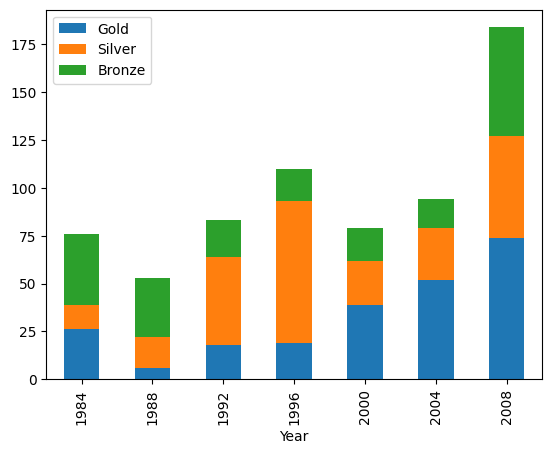

In [ ]:
inp = 'China'
try:
    inp = input("Select a country from above list")
except:
    print("Input interrupted")
finally:
    temp = q6_data[q6_data.Country == inp]
    temp.plot(kind = 'bar',stacked = True,x = 'Year', y= ['Gold', 'Silver', 'Bronze'])

Ans. So I created an interactive solution here. Input the country name from above list. And check its performance over year.

In [ ]:
display(q6_data.head())
q6_data.info()

,Year,Country,Gold,Silver,Bronze,Sum
30,1976,Soviet Union,113.0,93.0,79.0,285.0
10,1976,East Germany,99.0,51.0,42.0,192.0
37,1976,United States,63.0,56.0,36.0,155.0
39,1976,West Germany,21.0,24.0,30.0,75.0
26,1976,Poland,18.0,29.0,26.0,73.0


<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 30 to 557
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     559 non-null    int64  
 1   Country  559 non-null    object 
 2   Gold     559 non-null    float64
 3   Silver   559 non-null    float64
 4   Bronze   559 non-null    float64
 5   Sum      559 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 30.6+ KB


Q7. Can you tell me which country has dominated any particular sport?

In [ ]:
q7_data=data.groupby(['Sport','Country'])['Country'].count().reset_index(name='Count').sort_values(ascending=[True,False],by=['Sport','Count'])
q7_data.Sport.unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [ ]:
inp='Archery'
try:
  inp=input("Select a sport from above list")
except:
  print("Input is interrupted")
temp=q7_data[q7_data['Sport']==inp].head(3)
print(temp)

Input is interrupted
      Sport        Country  Count
56  Archery   Korea, South     52
67  Archery  United States     19
49  Archery          China     15


Q8. Has any athlete changed his or her Event or Discipline or sport and still win the medal?

In [ ]:
temp = data[['Athlete','Sport']].drop_duplicates()
temp = temp.groupby(['Athlete'])
for k,v in temp:
  if len(v['Sport'].tolist())>1:
    print(k,v['Sport'].tolist())

('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


Ans. So there has been quite a few player who has changed the sport and still won a medal. Kudos to them !

Q9. (Follow up of Q6) Elaborate the result and dive into detials.(Pick any 5 country for this)

In [ ]:
q9_data = (
    q6_data
    .sort_values(['Year', 'Sum'], ascending=[True, False])
    .groupby('Year')
    .head(5)
    .assign(Rank=lambda x: x.groupby('Year')['Sum'].rank(method='first', ascending=False))
    .pivot(index='Year', columns='Rank', values='Country')
    .rename(columns={1:'Gold', 2:'Silver', 3:'Bronze', 4:'4th', 5:'5th'})
    .reset_index()
)
q9_data

Rank,Year,Gold,Silver,Bronze,4th,5th
0,1976,Soviet Union,East Germany,United States,West Germany,Poland
1,1980,Soviet Union,East Germany,Bulgaria,Romania,Hungary
2,1984,United States,West Germany,Romania,Yugoslavia,Canada
3,1988,Soviet Union,United States,East Germany,West Germany,"Korea, South"
4,1992,United States,Unified team,Germany,China,Cuba
5,1996,United States,Australia,Germany,Russia,China
6,2000,United States,Russia,Australia,Germany,China
7,2004,United States,Russia,Australia,Germany,Italy
8,2008,United States,China,Australia,Russia,Germany


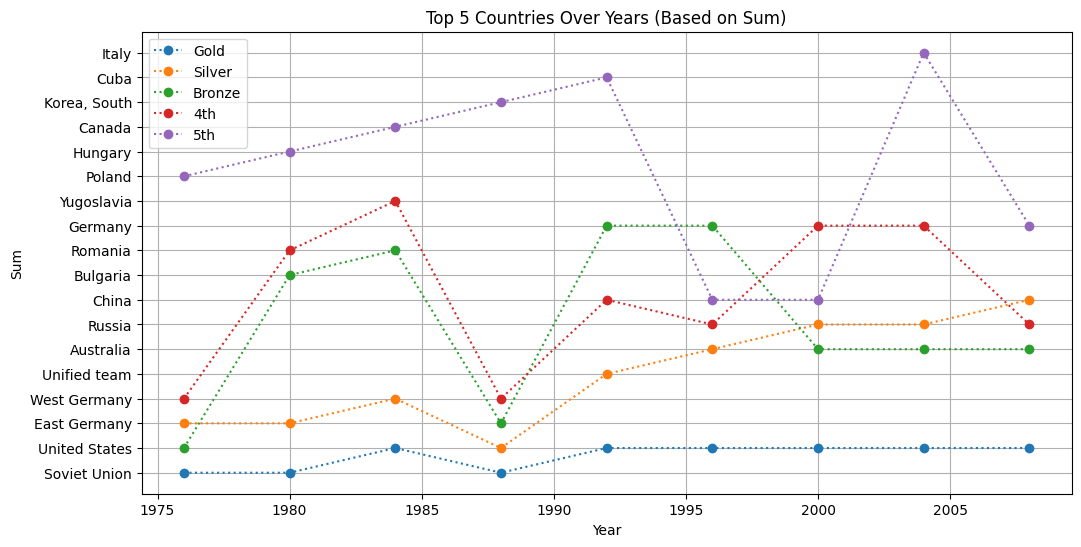

In [ ]:
plt.figure(figsize=(12, 6))

for col in q9_data.columns:
    if col != 'Year':
        plt.plot(q9_data['Year'], q9_data[col], linestyle=':', marker='o', label=col)

plt.title('Top 5 Countries Over Years (Based on Sum)')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.legend()
plt.grid(True)
plt.show()




1.   US after boycotting 1980 olympics, rose up to be the dominating player here.
2. China and Australia has witnessed steady rise in their medal tally
3. Romania has been same over period with little decline.

